# Example Notebook: Estimating Potentiometric Surface Levels

The potentiometric surface is the hypothetical level to which water would rise in a pizometer. In this set of examples we consider the hydraulic head in a confined aquifer that is 60m in thickness with a hydraulic conudtivity of 3.5x10$^{-5}$m/s. 


## Theim Equation For Steady-State Flow To A Single Well

For a confined aquifer, the Theim equation gives the difference ($s$) in head, $h$, at raidus $r$ from an known hydraulic head ($h_1$) at a radius ($r_1$) is given by

$$ s(r) = h_1 - h(r) =   \frac{Q_{well} \log(r_1/r)}{2 \pi H K_h} $$

Consider the case where into the example aquifer was sunk a fully penentrating well that contiually pumps 300 cubic meters per day. At a monitoring location 3km away, the steady state head is measured at 80m above the bottom of the aquifer. 

If we use the monitoring point at 1km away ($h_0$ and $r_0$) we have $h(r) = h_0 - s(r)$ and we can estimate the hydraulic head at distances from the well.

<ipython-input-1-3f800782c588>:22: RuntimeWarning: divide by zero encountered in true_divide
  s1_list = Qw * np.log(r1/r1_list_abs) / (2*np.pi * T)


Text(0, 0.5, 'Potentiometric level in aquifer [m]')

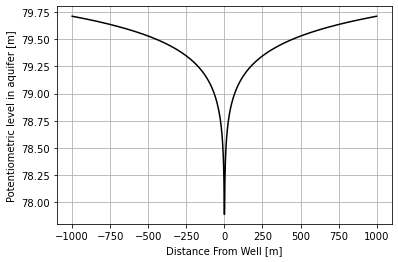

In [1]:
##### Import numeric python and the plotting library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Well Pump Rate
Qw = 300 # m^3/day
Qw = Qw/(24*60*60) # m^3 per sec

# Aquifer Thickness, conductivity, and transmisvitity
K_h = 3.5 * 10**-5
H = 60
T = K_h * H 

# at the monitoring point
r1 = 3000
h1 = 80

# Solving for the hydraulic head at many distances (here up to +/-1 km away)
r1_list = np.arange(-1000, 1000, 1)
r1_list_abs = np.abs(r1_list); # take absolute value
s1_list = Qw * np.log(r1/r1_list_abs) / (2*np.pi * T)
h1_list = h1 - s1_list

# Plot Well Drawdown
plt.plot(r1_list,h1_list,'k-'); plt.grid()
plt.xlabel('Distance From Well [m]'); 
plt.ylabel('Potentiometric level in aquifer [m]')

## Theim Equation For Steady-State Flow To Two Wells

We now consider what would happen if another well were to be installed 375m from the first and pumped at half the amount of water. 

To find the net influence of both wells, we can use '**superpositioning**', which means that we can calculate the drawdown from each well independently and then coombine both wells effects. Note this approach can be done for many wells.

<ipython-input-2-af0041d819ab>:20: RuntimeWarning: divide by zero encountered in true_divide
  s2_list = Qw2 * np.log(r1/r2_list_abs) / (2*np.pi * T)


Text(0, 0.5, 'Potentiometric level in aquifer [m]')

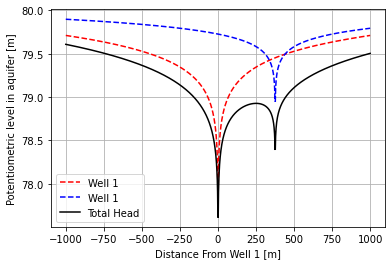

In [2]:
# Offest
offset = 375

# Well 2 Pump Rate
Qw2 = 300/2 # m^3/day
Qw2 = Qw2/(24*60*60) # m^3 per sec

# Aquifer Thickness, conductivity, and transmisvitity
K_h = 3.5 * 10**-5
H = 60
T = K_h * H 

# at the original monitoring point
r1 = 3000
h1 = 80

# Solving for the hydraulic head
r2_list = np.arange(-1000-offset, 1000-offset, 1)
r2_list_abs = np.abs(r2_list)
s2_list = Qw2 * np.log(r1/r2_list_abs) / (2*np.pi * T)
h2_list = h1 - s2_list

# Combine the drawdown from both wells
s1and2 = s1_list + s2_list
h1and2 = h1 - s1and2

# Plot Well Drawdown
plt.plot(r1_list,h1_list,'r--',label='Well 1')
plt.plot(r1_list,h2_list,'b--',label='Well 1')
plt.plot(r1_list,h1and2,'k-',label='Total Head')
#plt.plot(x2_list,h12_list,'k-',label='Total Head')
plt.legend(); plt.grid()
plt.xlabel('Distance From Well 1 [m]'); 
plt.ylabel('Potentiometric level in aquifer [m]')

## Theim Equation For Steady-State Flow With a No-Flow Bounday Condition

What if there is a impermiable boundary (no-flow) at some distance from the original well? This could be a rock outcrop, or other geologic feature. 

In this case no flow is possible. We represent this by creating an imaginary '**image well**' that is just as far from the barrier as our original well, but is *on the other side* of the barrier and that this well is *pumping at the same rate*. We then superimpose the increase drawdown from the image well with the drawdown from the original well. When this is done the slope of the hydraulic surface is zero at the barrier, indicating a no flow condition.

In this example we place an impermeable barrier 400m from our original well.

<ipython-input-3-d1bce66ec83f>:20: RuntimeWarning: divide by zero encountered in true_divide
  s3_list = Qw * np.log(r1/r3_list_abs) / (2*np.pi * T)
<ipython-input-3-d1bce66ec83f>:26: RuntimeWarning: divide by zero encountered in true_divide
  s4_list = Qw * np.log(r1/r4_list_abs) / (2*np.pi * T)


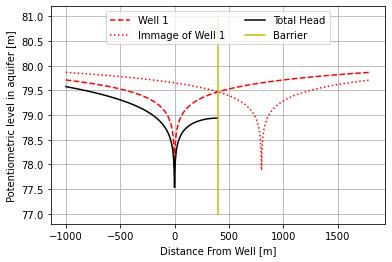

In [3]:
# Barrier Location
barrier = 400

# Well 1 Pump Rate
Qw = 300 # m^3/day
Qw = Qw/(24*60*60) # m^3 per sec

# Aquifer Thickness, conductivity, and transmisvitity
K_h = 3.5 * 10**-5
H = 60
T = K_h * H 

# at the monitoring point
r1 = 3000
h1 = 80

# Solving for the hydraulic head
r3_list = np.arange(-1000, 1000+2*barrier, 1)
r3_list_abs = np.abs(r3_list)
s3_list = Qw * np.log(r1/r3_list_abs) / (2*np.pi * T)
h3_list = h1 - s3_list

# Make the 'image' well
r4_list = np.arange(-1000-2*barrier, 1000, 1)
r4_list_abs = np.abs(r4_list)
s4_list = Qw * np.log(r1/r4_list_abs) / (2*np.pi * T)
h4_list = h1 - s4_list

# Combine the drawdown from both wells
s3and4 = s3_list + s4_list
h3and4 = h1 - s3and4
h3and4[r3_list>barrier] = np.nan

# Plot Well Drawdown
plt.plot(r3_list,h3_list,'r--',label='Well 1')
plt.plot(r3_list,h4_list,'r:',label='Immage of Well 1')
plt.plot(r3_list,h3and4,'k-',label='Total Head')
plt.plot([barrier, barrier],[77,81],'y-',label='Barrier')
plt.xlabel('Distance From Well [m]'); 
plt.ylabel('Potentiometric level in aquifer [m]')
plt.legend(ncol=2,loc='upper center')
plt.grid('on')


## Theim Equation For Steady-State Flow With a Constant Head Bounday Condition

What if there is a constant head at some distance from the original well? This can occur is there is a water body such as a lake or larger river.

In this case the head will remain constant at this location. We model this by again creating an 'imaginary well' that is just as far from the barrier as our original well, but is on the other side of the constant head boundary *and* then we treat the well as a if water were pumping **in** at the same rate. We then superimpose the increase in well level from the image well with the drawdown from the original well. When this is done the two cancel out at the half way point, indicating no change in head there.


<ipython-input-4-1e6eb6ed1de6>:20: RuntimeWarning: divide by zero encountered in true_divide
  s5_list = Qw * np.log(r1/r5_list_abs) / (2*np.pi * T)
<ipython-input-4-1e6eb6ed1de6>:26: RuntimeWarning: divide by zero encountered in true_divide
  s6_list = -Qw * np.log(r1/r6_list_abs) / (2*np.pi * T)


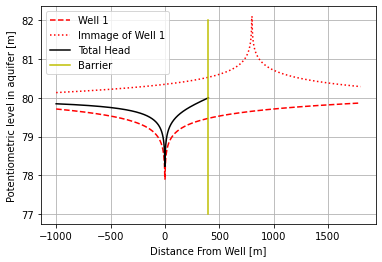

In [4]:
# Barrier Location
barrier = 400

# Well Pump Rate
Qw = 300 # m^3/day
Qw = Qw/(24*60*60) # m^3 per sec

# Aquifer Thickness, conductivity, and transmisvitity
K_h = 3.5 * 10**-5
H = 60
T = K_h * H 

# atthe monitoring point
r1 = 3000
h1 = 80

# Solving for the hydraulic head
r5_list = np.arange(-1000, 1000+2*barrier, 1)
r5_list_abs = np.abs(r5_list)
s5_list = Qw * np.log(r1/r5_list_abs) / (2*np.pi * T)
h5_list = h1 - s3_list

# Make the 'image' well
r6_list = np.arange(-1000-2*barrier, 1000, 1)
r6_list_abs = np.abs(r6_list)
s6_list = -Qw * np.log(r1/r6_list_abs) / (2*np.pi * T)
h6_list = h1 - s6_list

# Combine the drawdown from both wells
s5and6 = s5_list + s6_list
h5and6 = h1 - s5and6
h5and6[r5_list>barrier] = np.nan

# Plot Well Drawdown
plt.plot(r5_list,h5_list,'r--',label='Well 1')
plt.plot(r5_list,h6_list,'r:',label='Immage of Well 1')
plt.plot(r5_list,h5and6,'k-',label='Total Head')
plt.plot([barrier, barrier],[77,82],'y-',label='Barrier')
plt.xlabel('Distance From Well [m]'); 
plt.ylabel('Potentiometric level in aquifer [m]')
plt.legend()
plt.grid('on')
